# Matplotlib Advanced

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 그림의 구조

#### Figure 객체

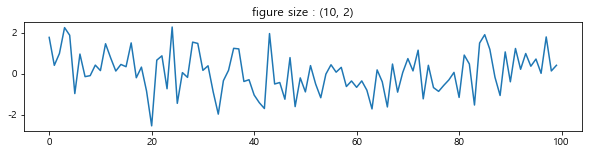

In [3]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.show()

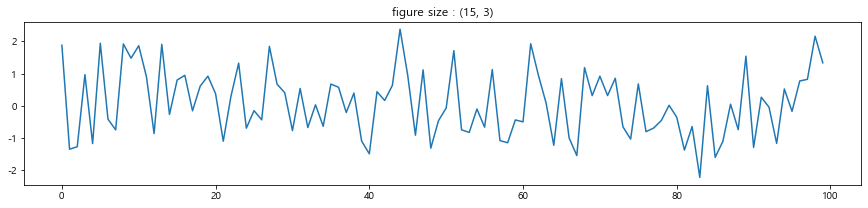

In [4]:
f2 = plt.figure(figsize=(15, 3))
plt.title("figure size : (15, 3)")
plt.plot(np.random.randn(100))
plt.show()

In [5]:
print(f1, id(f1))
print(f2, id(f2))

Figure(720x144) 2229633245776
Figure(1080x216) 2229687325552


#### Axes 객체와 subplot 명령

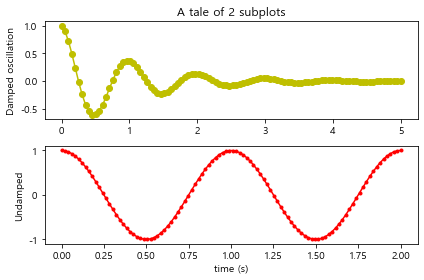

In [6]:
x1 = np.linspace(0.0, 5.0, 100)
x2 = np.linspace(0.0, 2.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.show()

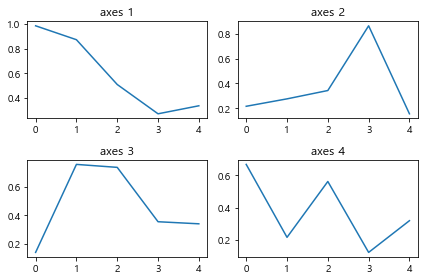

In [7]:
np.random.seed(2020)

plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

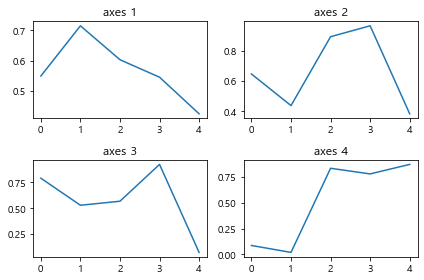

In [8]:
fig, axes = plt.subplots(2, 2)

np.random.seed(0)
axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")
axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()
plt.show()

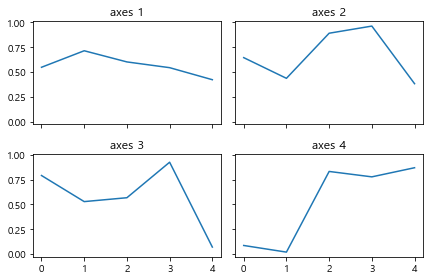

In [9]:
# for 반복문 사용
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

np.random.seed(0)
for i in range(2):
    for k in range(2):
        ax = axes[i][k]
        ax.plot(np.random.rand(5))
        ax.set_title(f"axes {2*i+k+1}")

plt.tight_layout()
plt.show()

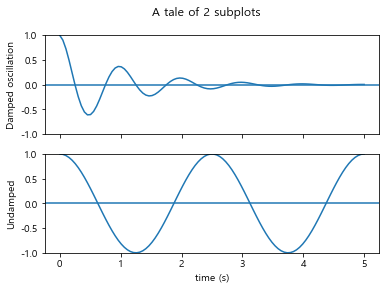

In [10]:
# for 반복문
x = np.linspace(0.0, 5.0, 100)

fig, axes = plt.subplots(2, 1, sharex=True)
for i in range(2):
    ax = axes[i]
    y = np.cos(2 * np.pi * x1) * np.exp(-x1) if i==0 else np.cos(2 * np.pi * x2)
    ylabel = 'Damped oscillation' if i==0 else 'Undamped'
    ax.plot(x, y)
    ax.axhline(0)
    ax.set_ylim(-1,1)
    ax.set_ylabel(ylabel)

plt.xlabel('time (s)')
fig.suptitle('A tale of 2 subplots')
plt.show()

#### Iris Box Plot을 하나의 그림으로 통합

In [11]:
import seaborn as sns
iris = sns.load_dataset('iris')

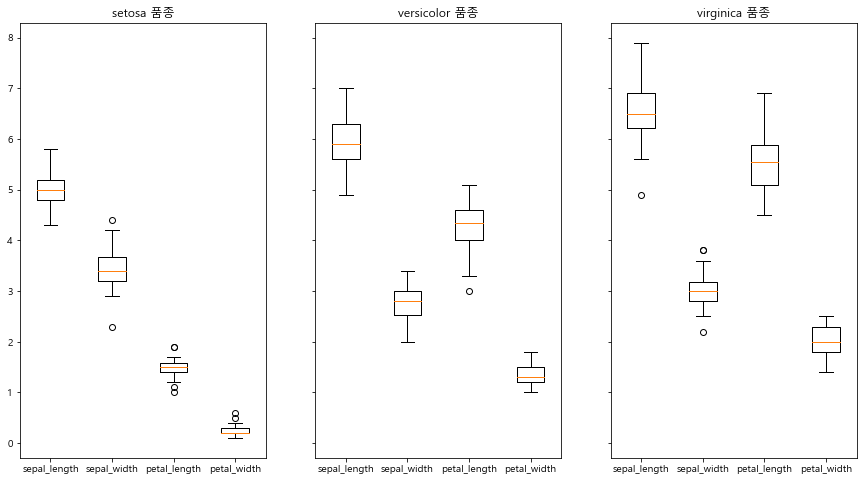

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,8), sharey=True)
for i, spec in enumerate(['setosa', 'versicolor', 'virginica']):
    sl = iris[iris.species == spec].sepal_length
    sw = iris[iris.species == spec].sepal_width
    pl = iris[iris.species == spec].petal_length
    pw = iris[iris.species == spec].petal_width
    ax = axes[i]
    ax.boxplot((sl, sw, pl, pw), 
        labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
    ax.set_title(f"{spec} 품종")
plt.show()

#### Anscombe's Quartet

In [13]:
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [14]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [15]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [16]:
ds1 = ans[ans.dataset == 'I']
ds2 = ans[ans.dataset == 'II']
ds3 = ans[ans.dataset == 'III']
ds4 = ans[ans.dataset == 'IV']

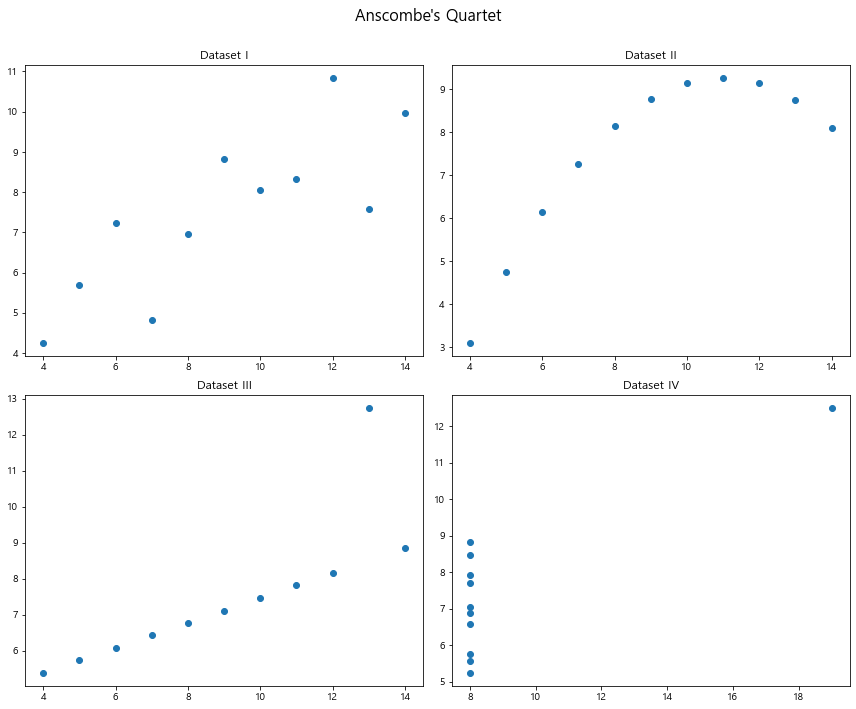

In [17]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.plot(ds1['x'], ds1['y'], 'o')
ax2.plot(ds2['x'], ds2['y'], 'o')
ax3.plot(ds3['x'], ds3['y'], 'o')
ax4.plot(ds4['x'], ds4['y'], 'o')

ax1.set_title('Dataset I')
ax2.set_title('Dataset II')
ax3.set_title('Dataset III')
ax4.set_title('Dataset IV')

fig.suptitle("Anscombe's Quartet", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

##### Code Refactoring

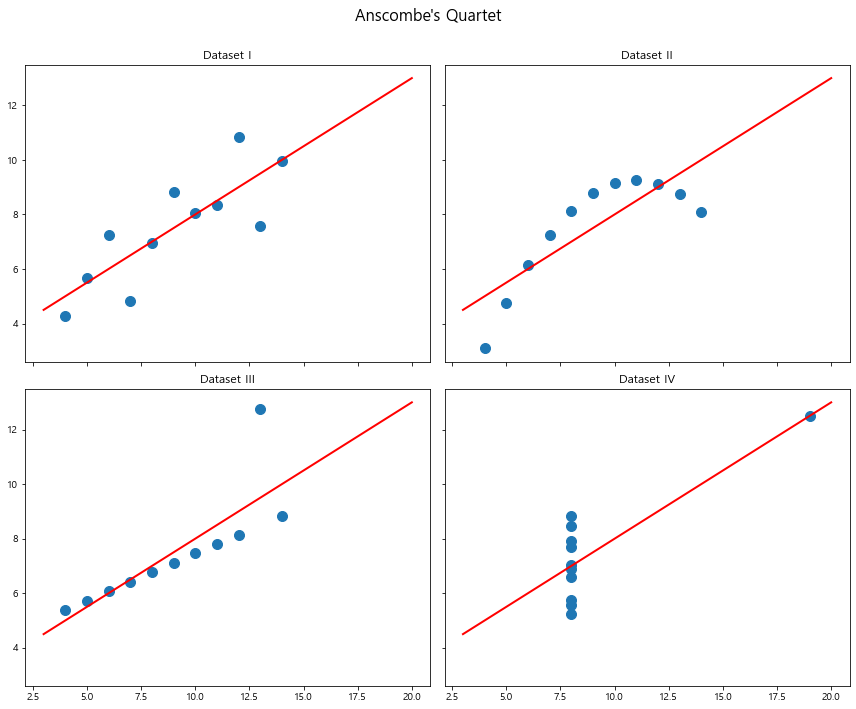

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12,10), sharex=True, sharey=True)
for i, num in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == num]
    ax = axes[i//2][i%2]
    ax.plot(ds.x, ds.y, 'o', markersize=10)
    ax.plot([3,20], [4.5,13], 'r-', lw=2)
    ax.set_title(f'Dataset {num}')

fig.suptitle("Anscombe's Quartet", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

#### Axis 객체와 축

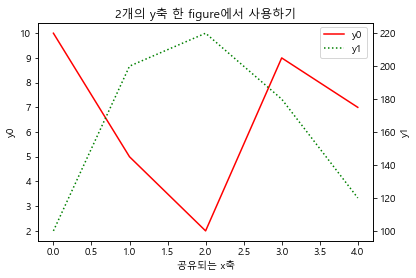

In [19]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")
fig.legend(loc='upper right', bbox_to_anchor=(0.86, 0.89))
plt.show()